In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Dados/dataset_olist_preparado.csv', parse_dates=['order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date'])

In [3]:
df[['review_score', 'product_category_name_english', 'price', 'freight_value', 'order_delivered_customer_date', 'order_estimated_delivery_date']].head()


,review_score,product_category_name_english,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date
0,4.0,housewares,29.99,8.72,2017-10-10 21:25:13,2017-10-18
1,4.0,housewares,29.99,8.72,2017-10-10 21:25:13,2017-10-18
2,4.0,housewares,29.99,8.72,2017-10-10 21:25:13,2017-10-18
3,4.0,perfumery,118.70,22.76,2018-08-07 15:27:45,2018-08-13
4,5.0,auto,159.90,19.22,2018-08-17 18:06:29,2018-09-04


In [4]:
# Tempo de entrega (em dias)
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Diferença entre entrega real e estimada
df['atraso'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Valor total do pedido (produto + frete)
df['valor_total'] = df['price'] + df['freight_value']


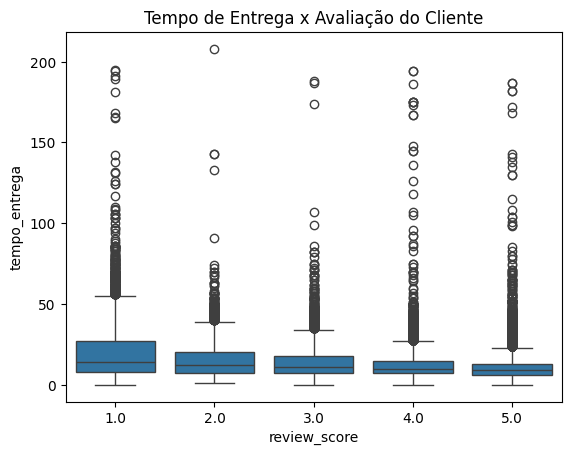

In [5]:
sns.boxplot(x='review_score', y='tempo_entrega', data=df)
plt.title('Tempo de Entrega x Avaliação do Cliente')
plt.show()


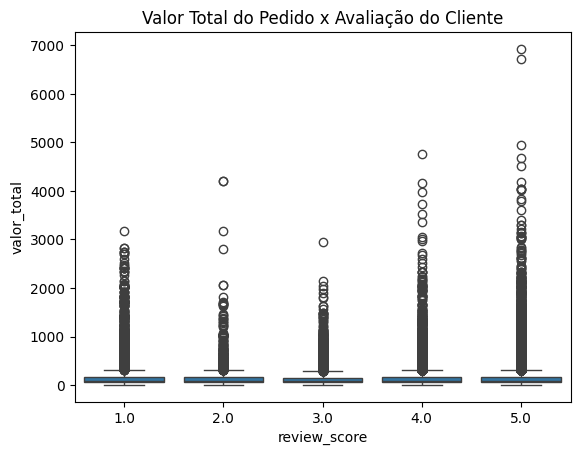

In [6]:
sns.boxplot(x='review_score', y='valor_total', data=df)
plt.title('Valor Total do Pedido x Avaliação do Cliente')
plt.show()


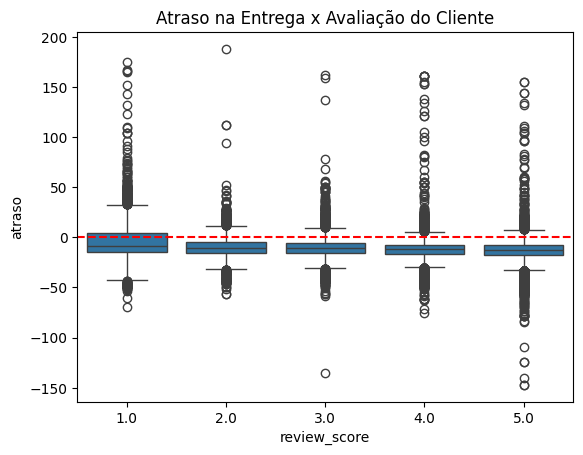

In [7]:
sns.boxplot(x='review_score', y='atraso', data=df)
plt.title('Atraso na Entrega x Avaliação do Cliente')
plt.axhline(0, color='red', linestyle='--')
plt.show()


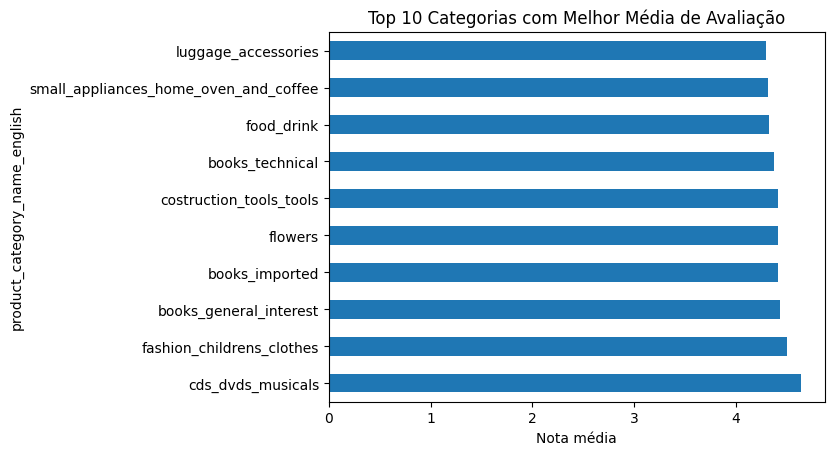

In [8]:
media_categoria = df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)

media_categoria.plot(kind='barh')
plt.title('Top 10 Categorias com Melhor Média de Avaliação')
plt.xlabel('Nota média')
plt.show()


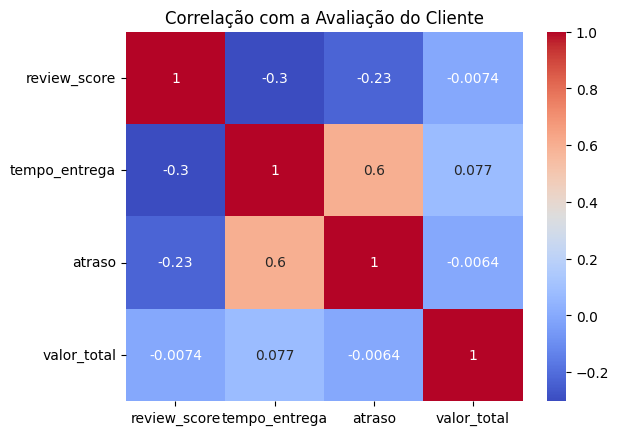

In [9]:
corr = df[['review_score', 'tempo_entrega', 'atraso', 'valor_total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação com a Avaliação do Cliente')
plt.show()
